<a href="https://colab.research.google.com/github/samanthajmichael/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## Dataframe Manipulation in Python

### Introduction to SQL in Python

* **SQL in Python**: SQL (Structured Query Language) is used for managing and manipulating relational database systems. Python provides libraries such as sqlite3 and SQLAlchemy that allow SQL to be run directly from Python scripts.
* **Variants of SQL**: There are several dialects of SQL including MySQL, PostgreSQL, and T-SQL, each with unique features and functions. These can be interfaced with Python using appropriate connectors and adapters.
* **Relational Tables and Databases**: SQL operates on data stored in relational tables. Each table in a relational database can be manipulated using SQL queries. Python's ability to interface with SQL allows for powerful data retrieval and manipulation directly from databases.

### Dataframes with pandas in Python

* **What is `pandas`?**: pandas is a high-level data manipulation tool developed in Python, designed to work with "dataframes" — a concept borrowed from R. A dataframe is a 2D labeled data structure with columns of potentially different types.

* **Design of pandas**: pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment. It offers data structures and operations for manipulating numerical tables and time series.
* **Limitations of pandas**:
Memory usage: pandas often requires a lot of memory to hold all data in memory, which can be inefficient for very large datasets.
Speed: Operations in pandas, particularly complex manipulations, can be slower compared to some other frameworks designed to work with out-of-core data (data that doesn't fit into memory).

### Alternative Frameworks:
* `polars`: A dataframe library designed for performance, efficiency, and to utilize modern hardware.
* `Dask`: Similar to pandas but designed to be parallel and work with larger-than-memory datasets by breaking the dataframe into smaller pieces.
* `Vaex`: Optimized for performance in large datasets, using lazy evaluations and memory mapping of data, allowing fast operations on billion-row datasets without the need to load everything into memory.


## What is Ibis?

The Ibis project is an independently governed open source community project to build and maintain the portable Python dataframe library.
* Core Ibis maintainers are employed by Voltron Data.
* Voltron Data’s support of Ibis is a part of its strategy to enable modular and composable systems for data analytics.

[Voltron Blog](https://ibis-project.org/posts/why-voda-supports-ibis/)

## Why not pandas?

> This is a great, and natural, question – if Voltron Data wants a standard Python dataframe API, why not just use pandas? The reason is relatively simple: **the pandas API inherently does not scale.** This is largely due to the expectation of ordered results and the index. pandas is implemented for single-threaded execution and has a lot of baggage when it comes to distributed execution. While projects like Modin and pandas on Spark (formerly Koalas) attempt to scale the pandas API, any project that attempts the feat is doomed to a dubious support matrix of operations.
>
> Instead, Wes McKinney envisioned Ibis as a portable Python dataframe where the API is decoupled from the execution engine. Ibis code scales to the backend it is connected to. Any other Python dataframe library locks you into its execution engine. While they may claim to be easy to migrate to, this is rarely the case. The founders of Voltron Data experienced these pains with the pandas API themselves in previous efforts, including cuDF. For Theseus and as an open source standard, we believe Ibis is the right approach.

For more motivation, read about the [Data Wall](https://voltrondata.com/codex/accelerated-hardware#4-1-the-wall).

Voltron Data supports Ibis because it can serve as a universal Python dataframe API for any backend engine. Ibis works great whether you need to query a CSV file on your laptop with DuckDB, run a big ETL job in the cloud with Snowflake or Starburst Galaxy, or process hundreds of terabytes in minutes on a platform running Theseus on NVIDIA GPUs. With Ibis, you have the choice of 20+ backends, and the code you write is the same regardless of which backend you choose to use.

## References

For the rest of this notebook, we'll use [Ibis](https://ibis-project.org/) docs, focusing on their tutorials:

* [Ibis for `dplyr` users](https://ibis-project.org/tutorials/ibis-for-dplyr-users)
* [Ibis for `pandas` users](https://ibis-project.org/tutorials/ibis-for-pandas-users)
* [Ibis for SQL users](https://ibis-project.org/tutorials/ibis-for-sql-users)

There was also a recent Probabl: podcast with one of the core contributors to Ibis:

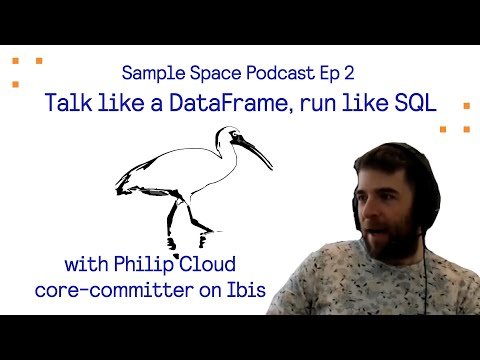

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('V1_xdQYlWAc', width=800, height=600, start=66)


## Installation

In [1]:
#%%capture
!pip uninstall -y bigframes
!pip uninstall -y 'ibis-framework[examples,duckdb]'

Found existing installation: bigframes 1.7.0
Uninstalling bigframes-1.7.0:
  Successfully uninstalled bigframes-1.7.0
Found existing installation: ibis-framework 9.0.0
Uninstalling ibis-framework-9.0.0:
  Successfully uninstalled ibis-framework-9.0.0


In [2]:
%%capture
!pip install --upgrade bigframes
!pip install --upgrade 'ibis-framework[examples,duckdb]'

In [3]:
import ibis
import ibis.examples as ex
import ibis.selectors as s
import pandas as pd
from ibis import _

ibis.options.interactive = True

starwars = ex.starwars.fetch()

In [4]:
starwars.head(5)

┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name           ┃ height ┃ mass    ┃ hair_color ┃ skin_color  ┃ eye_color ┃ birth_year ┃ sex    ┃ gender    ┃ homeworld ┃ species ┃ films  ┃ vehicles ┃ starships ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
│ string         │ int64  │ float64 │ string     │ string      │ string    │ float64    │ string │ string    │ string    │ string  │ string │ string   │ string    │
├────────────────┼────────┼─────────┼────────────┼─────────────┼───────────┼────────────┼────────┼───────────┼───────────┼─────────┼────────┼──────────┼───────────┤
│ Luke Skywalker │    172 │    77.0 │ blond      │ fair        │ blue      │       19.0 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ C-3PO          │    167 │    75.0 │ NULL       │ gold        │ yellow    │      112.0 │ none   │ masculine │ Tatooine  │ Droid   │ NULL   │ NULL     │ NULL      │
│ R2-D2          │     96 │    32.0 │ NULL       │ white, blue │ red       │       33.0 │ none   │ masculine │ Naboo     │ Droid   │ NULL   │ NULL     │ NULL      │
│ Darth Vader    │    202 │   136.0 │ none       │ white       │ yellow    │       41.9 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ Leia Organa    │    150 │    49.0 │ brown      │ light       │ brown     │       19.0 │ female │ feminine  │ Alderaan  │ Human   │ NULL   │ NULL     │ NULL      │
└────────────────┴────────┴─────────┴────────────┴─────────────┴───────────┴────────────┴────────┴───────────┴───────────┴─────────┴────────┴──────────┴───────────┘

In [5]:
type(starwars)

ibis.expr.types.relations.Table

In [6]:
# select columns
starwars.height


┏━━━━━━━━┓
┃ height ┃
┡━━━━━━━━┩
│ int64  │
├────────┤
│    172 │
│    167 │
│     96 │
│    202 │
│    150 │
│    178 │
│    165 │
│     97 │
│    183 │
│    182 │
│      … │
└────────┘

In [7]:
# filter
starwars.height > 150

┏━━━━━━━━━━━━━━━━━━━━━━┓
┃ Greater(height, 150) ┃
┡━━━━━━━━━━━━━━━━━━━━━━┩
│ boolean              │
├──────────────────────┤
│ True                 │
│ True                 │
│ False                │
│ True                 │
│ False                │
│ True                 │
│ True                 │
│ False                │
│ True                 │
│ True                 │
│ …                    │
└──────────────────────┘

In [8]:
# slicing
starwars[starwars.height > 150]

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name               ┃ height ┃ mass    ┃ hair_color    ┃ skin_color ┃ eye_color ┃ birth_year ┃ sex    ┃ gender    ┃ homeworld ┃ species ┃ films  ┃ vehicles ┃ starships ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━┩
│ string             │ int64  │ float64 │ string        │ string     │ string    │ float64    │ string │ string    │ string    │ string  │ string │ string   │ string    │
├────────────────────┼────────┼─────────┼───────────────┼────────────┼───────────┼────────────┼────────┼───────────┼───────────┼─────────┼────────┼──────────┼───────────┤
│ Luke Skywalker     │    172 │    77.0 │ blond         │ fair       │ blue      │       19.0 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ C-3PO              │    167 │    75.0 │ NULL          │ gold       │ yellow    │      112.0 │ none   │ masculine │ Tatooine  │ Droid   │ NULL   │ NULL     │ NULL      │
│ Darth Vader        │    202 │   136.0 │ none          │ white      │ yellow    │       41.9 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ Owen Lars          │    178 │   120.0 │ brown, grey   │ light      │ blue      │       52.0 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ Beru Whitesun Lars │    165 │    75.0 │ brown         │ light      │ blue      │       47.0 │ female │ feminine  │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ Biggs Darklighter  │    183 │    84.0 │ black         │ light      │ brown     │       24.0 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ Obi-Wan Kenobi     │    182 │    77.0 │ auburn, white │ fair       │ blue-gray │       57.0 │ male   │ masculine │ Stewjon   │ Human   │ NULL   │ NULL     │ NULL      │
│ Anakin Skywalker   │    188 │    84.0 │ blond         │ fair       │ blue      │       41.9 │ male   │ masculine │ Tatooine  │ Human   │ NULL   │ NULL     │ NULL      │
│ Wilhuff Tarkin     │    180 │    NULL │ auburn, grey  │ fair       │ blue      │       64.0 │ male   │ masculine │ Eriadu    │ Human   │ NULL   │ NULL     │ NULL      │
│ Chewbacca          │    228 │   112.0 │ brown         │ unknown    │ blue      │      200.0 │ male   │ masculine │ Kashyyyk  │ Wookiee │ NULL   │ NULL     │ NULL      │
│ …                  │      … │       … │ …             │ …          │ …         │          … │ …      │ …         │ …         │ …       │ …      │ …        │ …         │
└────────────────────┴────────┴─────────┴───────────────┴────────────┴───────────┴────────────┴────────┴───────────┴───────────┴─────────┴────────┴──────────┴───────────┘

In [9]:
# slicing
starwars[starwars.height > 150].select(["name","height"])

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ name               ┃ height ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ string             │ int64  │
├────────────────────┼────────┤
│ Luke Skywalker     │    172 │
│ C-3PO              │    167 │
│ Darth Vader        │    202 │
│ Owen Lars          │    178 │
│ Beru Whitesun Lars │    165 │
│ Biggs Darklighter  │    183 │
│ Obi-Wan Kenobi     │    182 │
│ Anakin Skywalker   │    188 │
│ Wilhuff Tarkin     │    180 │
│ Chewbacca          │    228 │
│ …                  │      … │
└────────────────────┴────────┘

In [10]:
f = starwars[starwars.height > 150].select(["name","height"])

ibis.to_sql(f) ## can specify the dialect of SQL

```sql
SELECT
  "t0"."name",
  "t0"."height"
FROM "starwars" AS "t0"
WHERE
  "t0"."height" > CAST(150 AS SMALLINT)
```

## For `dplyr` users

[Ibis for `dplyr` users](https://ibis-project.org/tutorials/ibis-for-dplyr-users)

In general, `ibis` tends to follow `dplyr` the most. For example, this R code:

```{r}
starwars |>
  filter(skin_color == "light")
```

is equivalent to:

In [ ]:
starwars.filter(_.skin_color == "light") ## the underscore is how you tell it that it is a continuation of the pipe

## For `pandas` users

See [this blog](https://ibis-project.org/tutorials/ibis-for-pandas-users).

In [11]:
# convert
starwars.to_pandas()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species,films,vehicles,starships
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human,None,None,None
1,C-3PO,167.0,75.0,None,gold,yellow,112.0,none,masculine,Tatooine,Droid,None,None,None
2,R2-D2,96.0,32.0,None,"white, blue",red,33.0,none,masculine,Naboo,Droid,None,None,None
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human,None,None,None
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Finn,NaN,NaN,black,dark,dark,NaN,male,masculine,None,Human,None,None,None
83,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,None,Human,None,None,None
84,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,None,Human,None,None,None
85,BB8,NaN,NaN,none,none,black,NaN,none,masculine,None,Droid,None,None,None


In [12]:
# convert from pandas
df = pd.DataFrame(
    [["a", 1, 2], ["b", 3, 4]],
    columns=["one", "two", "three"],
    index=[5, 6],
)
df

,one,two,three
5,a,1,2
6,b,3,4


In [13]:
t = ibis.memtable(df, name="t")

t

┏━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃ one    ┃ two   ┃ three ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ string │ int64 │ int64 │
├────────┼───────┼───────┤
│ a      │     1 │     2 │
│ b      │     3 │     4 │
└────────┴───────┴───────┘

## For SQL users

[Ibis for SQL users](https://ibis-project.org/tutorials/ibis-for-sql-users)

In [14]:
# save and run as
p = starwars.select(s.startswith("h"))

ibis.to_sql(p)

```sql
SELECT
  "t0"."height",
  "t0"."hair_color",
  "t0"."homeworld"
FROM "starwars" AS "t0"
```

In [15]:
starwars.sql(ibis.to_sql(p))

┏━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ height ┃ hair_color    ┃ homeworld ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ string        │ string    │
├────────┼───────────────┼───────────┤
│    172 │ blond         │ Tatooine  │
│    167 │ NULL          │ Tatooine  │
│     96 │ NULL          │ Naboo     │
│    202 │ none          │ Tatooine  │
│    150 │ brown         │ Alderaan  │
│    178 │ brown, grey   │ Tatooine  │
│    165 │ brown         │ Tatooine  │
│     97 │ NULL          │ Tatooine  │
│    183 │ black         │ Tatooine  │
│    182 │ auburn, white │ Stewjon   │
│      … │ …             │ …         │
└────────┴───────────────┴───────────┘

## How many characters are there?

In [16]:
# SQL
starwars.sql("SELECT count(name) as count FROM starwars")

┏━━━━━━━┓
┃ count ┃
┡━━━━━━━┩
│ int64 │
├───────┤
│    87 │
└───────┘

In [17]:
# Ibis
starwars.aggregate(count=_.name.count())

┏━━━━━━━┓
┃ count ┃
┡━━━━━━━┩
│ int64 │
├───────┤
│    87 │
└───────┘

In [18]:
starwars.count("name")

87

In [19]:
starwars.name.nunique()

87

## What is the average height of all characters?


In [20]:
# SQL
starwars.sql("SELECT AVG(height) FROM starwars")

┏━━━━━━━━━━━━━┓
┃ avg(height) ┃
┡━━━━━━━━━━━━━┩
│ float64     │
├─────────────┤
│  174.604938 │
└─────────────┘

In [21]:
# Ibis
starwars.aggregate(avg_height = (_.height.sum() / _.height.count()))

┏━━━━━━━━━━━━┓
┃ avg_height ┃
┡━━━━━━━━━━━━┩
│ float64    │
├────────────┤
│ 174.604938 │
└────────────┘

## List all characters that are droids.

In [22]:
# SQL
starwars.sql("SELECT name FROM starwars WHERE species == 'Droid'")

┏━━━━━━━━┓
┃ name   ┃
┡━━━━━━━━┩
│ string │
├────────┤
│ C-3PO  │
│ R2-D2  │
│ R5-D4  │
│ IG-88  │
│ R4-P17 │
│ BB8    │
└────────┘

In [23]:
# Ibis
starwars.filter(_.species == "Droid").select("name")

┏━━━━━━━━┓
┃ name   ┃
┡━━━━━━━━┩
│ string │
├────────┤
│ C-3PO  │
│ R2-D2  │
│ R5-D4  │
│ IG-88  │
│ R4-P17 │
│ BB8    │
└────────┘

## Find the character with the maximum mass.

In [24]:
# SQL
starwars.sql("SELECT name, mass FROM starwars ORDER BY mass desc LIMIT 1")

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name                  ┃ mass    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string                │ float64 │
├───────────────────────┼─────────┤
│ Jabba Desilijic Tiure │  1358.0 │
└───────────────────────┴─────────┘

In [25]:
# Ibis
starwars.order_by(ibis.desc(_.mass)).select("name","mass").limit(1)

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name                  ┃ mass    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string                │ float64 │
├───────────────────────┼─────────┤
│ Jabba Desilijic Tiure │  1358.0 │
└───────────────────────┴─────────┘

## How many unique species are present in the dataset?

In [26]:
# SQL
starwars.sql("SELECT count(distinct species) as CNT FROM starwars")

┏━━━━━━━┓
┃ CNT   ┃
┡━━━━━━━┩
│ int64 │
├───────┤
│    37 │
└───────┘

In [27]:
# Ibis
starwars.aggregate(count=_.species.nunique())

┏━━━━━━━┓
┃ count ┃
┡━━━━━━━┩
│ int64 │
├───────┤
│    37 │
└───────┘

In [28]:
starwars.species.nunique()

37

In [30]:
starwars[["species"]].distinct().count()

38

## Display the five oldest characters by their birth year


In [31]:
# SQL
starwars.sql("SELECT name, birth_year FROM starwars ORDER BY birth_year desc LIMIT 5")

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name                  ┃ birth_year ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ string                │ float64    │
├───────────────────────┼────────────┤
│ Yoda                  │      896.0 │
│ Jabba Desilijic Tiure │      600.0 │
│ Chewbacca             │      200.0 │
│ C-3PO                 │      112.0 │
│ Dooku                 │      102.0 │
└───────────────────────┴────────────┘

In [32]:
# Ibis
starwars[["name","birth_year"]].order_by(ibis.desc(_.birth_year)).head(5)

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name                  ┃ birth_year ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ string                │ float64    │
├───────────────────────┼────────────┤
│ Yoda                  │      896.0 │
│ Jabba Desilijic Tiure │      600.0 │
│ Chewbacca             │      200.0 │
│ C-3PO                 │      112.0 │
│ Dooku                 │      102.0 │
└───────────────────────┴────────────┘

## Count the number of characters with each unique eye color.


In [33]:
# SQL
starwars.sql("SELECT eye_color, count(name) as CNT FROM starwars GROUP BY eye_color ORDER BY count(name) desc")

┏━━━━━━━━━━━┳━━━━━━━┓
┃ eye_color ┃ CNT   ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ string    │ int64 │
├───────────┼───────┤
│ brown     │    21 │
│ blue      │    19 │
│ yellow    │    11 │
│ black     │    10 │
│ orange    │     8 │
│ red       │     5 │
│ unknown   │     3 │
│ hazel     │     3 │
│ pink      │     1 │
│ gold      │     1 │
│ …         │     … │
└───────────┴───────┘

In [34]:
# Ibis
starwars[["eye_color","name"]].group_by("eye_color").aggregate(count = _.name.count()).order_by(ibis.desc("count"))

┏━━━━━━━━━━━┳━━━━━━━┓
┃ eye_color ┃ count ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ string    │ int64 │
├───────────┼───────┤
│ brown     │    21 │
│ blue      │    19 │
│ yellow    │    11 │
│ black     │    10 │
│ orange    │     8 │
│ red       │     5 │
│ unknown   │     3 │
│ hazel     │     3 │
│ pink      │     1 │
│ gold      │     1 │
│ …         │     … │
└───────────┴───────┘

## Find all characters who are female and have brown hair.


In [35]:
# SQL
starwars.sql("SELECT name, sex, hair_color FROM starwars WHERE sex == 'female' AND hair_color LIKE 'brown'")

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ name               ┃ sex    ┃ hair_color ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ string             │ string │ string     │
├────────────────────┼────────┼────────────┤
│ Leia Organa        │ female │ brown      │
│ Beru Whitesun Lars │ female │ brown      │
│ Padmé Amidala      │ female │ brown      │
│ Dormé              │ female │ brown      │
│ Rey                │ female │ brown      │
└────────────────────┴────────┴────────────┘

In [36]:
# Ibis
starwars["name","sex","hair_color"].filter([_.hair_color.ilike("%brown"),_.sex == "female"])

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ name               ┃ sex    ┃ hair_color ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ string             │ string │ string     │
├────────────────────┼────────┼────────────┤
│ Leia Organa        │ female │ brown      │
│ Beru Whitesun Lars │ female │ brown      │
│ Padmé Amidala      │ female │ brown      │
│ Dormé              │ female │ brown      │
│ Rey                │ female │ brown      │
└────────────────────┴────────┴────────────┘

## Display the name and species of characters who have a birth year less than 50 but greater than 20.


In [37]:
# SQL
starwars.filter([_.birth_year < 50, _.birth_year > 20]).select("name","species","birth_year").order_by("birth_year")

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name              ┃ species      ┃ birth_year ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ string            │ string       │ float64    │
├───────────────────┼──────────────┼────────────┤
│ Wedge Antilles    │ Human        │       21.0 │
│ Plo Koon          │ Kel Dor      │       22.0 │
│ Biggs Darklighter │ Human        │       24.0 │
│ Han Solo          │ Human        │       29.0 │
│ Lando Calrissian  │ Human        │       31.0 │
│ Boba Fett         │ Human        │       31.5 │
│ R2-D2             │ Droid        │       33.0 │
│ Lobot             │ Human        │       37.0 │
│ Barriss Offee     │ Mirialan     │       40.0 │
│ Ackbar            │ Mon Calamari │       41.0 │
│ …                 │ …            │          … │
└───────────────────┴──────────────┴────────────┘

In [38]:
# Ibis
starwars.sql("SELECT name, species FROM starwars WHERE birth_year > 20 AND birth_year < 50")

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name               ┃ species ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string             │ string  │
├────────────────────┼─────────┤
│ R2-D2              │ Droid   │
│ Darth Vader        │ Human   │
│ Beru Whitesun Lars │ Human   │
│ Biggs Darklighter  │ Human   │
│ Anakin Skywalker   │ Human   │
│ Han Solo           │ Human   │
│ Greedo             │ Rodian  │
│ Wedge Antilles     │ Human   │
│ Boba Fett          │ Human   │
│ Lando Calrissian   │ Human   │
│ …                  │ …       │
└────────────────────┴─────────┘

## Which homeworld has the most characters in this dataset?


In [39]:
starwars.group_by("homeworld").aggregate(count=_.count()).order_by(ibis.desc("count")).head(1)

┏━━━━━━━━━━━┳━━━━━━━┓
┃ homeworld ┃ count ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ string    │ int64 │
├───────────┼───────┤
│ Naboo     │    11 │
└───────────┴───────┘

In [40]:
starwars.sql("SELECT homeworld, COUNT(*) AS count FROM starwars GROUP BY homeworld ORDER BY count DESC LIMIT 1")

┏━━━━━━━━━━━┳━━━━━━━┓
┃ homeworld ┃ count ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ string    │ int64 │
├───────────┼───────┤
│ Naboo     │    11 │
└───────────┴───────┘

## Lab 1 Assignment

Answer the following questions with both Ibis and SQL code. You may and are encouraged to include Markdown text to explain your results.

In [41]:
# How many characters have a known hair color (i.e., hair_color is not NULL)?

#IBIS

In [42]:
starwars.hair_color.count()

82

#SQL

In [43]:
starwars.sql("SELECT COUNT(*) as 'Count of Characters with Known Hair Color' FROM starwars WHERE hair_color is not NULL")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Count of Characters with Known Hair Color ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64                                     │
├───────────────────────────────────────────┤
│                                        82 │
└───────────────────────────────────────────┘

In [44]:
# What is the average mass of characters whose height is above 150?

#IBIS

In [45]:
starwars.filter(_.height > 150).aggregate(avg_mass=starwars.mass.mean())

┏━━━━━━━━━━━┓
┃ avg_mass  ┃
┡━━━━━━━━━━━┩
│ float64   │
├───────────┤
│ 107.67451 │
└───────────┘

#SQL

In [46]:
starwars.sql("SELECT AVG(mass) as 'Average Mass Where Height > 150' FROM starwars WHERE height > 150")

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Average Mass Where Height > 150 ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ float64                         │
├─────────────────────────────────┤
│                       107.67451 │
└─────────────────────────────────┘

In [47]:
# Find the names and homeworlds of all characters with 'blue' eye color but without a specified skin_color.

#IBIS

In [48]:
starwars['name', 'homeworld', 'eye_color', 'skin_color'].filter([_.eye_color == 'blue', _.skin_color == 'unknown'])

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name      ┃ homeworld ┃ eye_color ┃ skin_color ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ string    │ string    │ string    │ string     │
├───────────┼───────────┼───────────┼────────────┤
│ Chewbacca │ Kashyyyk  │ blue      │ unknown    │
└───────────┴───────────┴───────────┴────────────┘

#SQL

In [52]:
starwars.sql("SELECT name, homeworld, eye_color, skin_color FROM starwars WHERE eye_color = 'blue' AND skin_color = 'unknown'")

┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name      ┃ homeworld ┃ eye_color ┃ skin_color ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ string    │ string    │ string    │ string     │
├───────────┼───────────┼───────────┼────────────┤
│ Chewbacca │ Kashyyyk  │ blue      │ unknown    │
└───────────┴───────────┴───────────┴────────────┘

In [53]:
# Display the homeworld and count of characters for each homeworld, only including homeworlds with more than one character.

#IBIS

In [89]:
group = starwars.group_by('homeworld').aggregate(count=_.name.count())
filter = group.filter(group['count'] > 1)
filter

┏━━━━━━━━━━━┳━━━━━━━┓
┃ homeworld ┃ count ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ string    │ int64 │
├───────────┼───────┤
│ Naboo     │    11 │
│ Kashyyyk  │     2 │
│ NULL      │    10 │
│ Kamino    │     3 │
│ Coruscant │     3 │
│ Ryloth    │     2 │
│ Tatooine  │    10 │
│ Alderaan  │     3 │
│ Corellia  │     2 │
│ Mirial    │     2 │
└───────────┴───────┘

#SQL

In [55]:
starwars.sql("SELECT homeworld as Homeworld, COUNT(name) as Count FROM starwars GROUP BY homeworld HAVING COUNT(name)>1 ORDER BY Count DESC")

┏━━━━━━━━━━━┳━━━━━━━┓
┃ Homeworld ┃ Count ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ string    │ int64 │
├───────────┼───────┤
│ Naboo     │    11 │
│ NULL      │    10 │
│ Tatooine  │    10 │
│ Kamino    │     3 │
│ Coruscant │     3 │
│ Alderaan  │     3 │
│ Kashyyyk  │     2 │
│ Ryloth    │     2 │
│ Corellia  │     2 │
│ Mirial    │     2 │
└───────────┴───────┘

After you've filled out the above answers, to submit this assignment you will need to:
1. Have created a personal GitHub Repo named "dsba6211-summer2024-labs", e.g., follow [these instructions](https://docs.github.com/en/repositories/creating-and-managing-repositories/quickstart-for-repositories#create-a-repository).
2. Save this notebook into a subfolder named `notebooks` into that repo. You can do so "File > Save a copy in GitHub". You will have needed to provide GitHub authorization to Colab.
3. Go to your GitHub repo and find the link to your new saved notebook.